<a href="https://colab.research.google.com/github/pschwartz222/MA-540-/blob/main/Variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy.linalg import eig
from numpy import linalg as LA
import math
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.stats import norm
from scipy.stats import binom

Let's observe the variance of the normal distribution.

Var(N_0) = 1.0
Var(N_1) = 0.25
Var(N_2) = 4.0


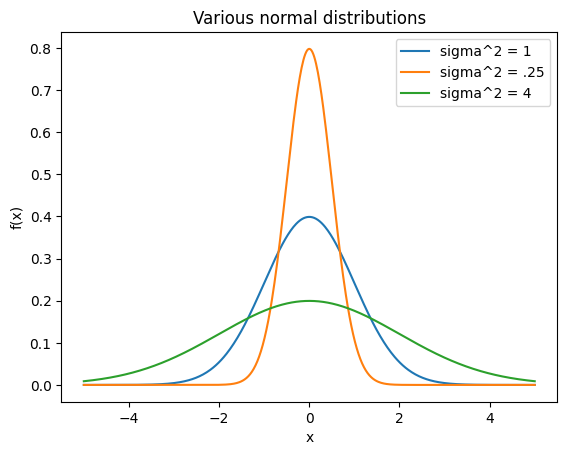

P(-sigma <= N_0 <= sigma) =  0.6827
P(-sigma <= N_1 <= sigma) =  0.6827
P(-sigma <= N_2 <= sigma) =  0.6827


In [ ]:
#generate normal random variables with mean 0 and variance 1, .25, and 4 respectively
N_0 = norm(0, 1)
N_1 = norm(0, .5)
N_2 = norm(0, 2)

#calculate the variance of these random variables
var_0 = N_0.stats(moments = 'v')
var_1 = N_1.stats(moments = 'v')
var_2 = N_2.stats(moments = 'v')

sig_0 = math.sqrt(var_0)
sig_1 = math.sqrt(var_1)
sig_2 = math.sqrt(var_2)

print('Var(N_0) =', var_0)
print('Var(N_1) =', var_1)
print('Var(N_2) =', var_2)

#plot their pmfs

x = np.linspace(-5, 5, 500) #interval from -5 to 5 partitioned into 500 subintervals

plt.plot(x, N_0.pdf(x), label = 'sigma^2 = 1')
plt.plot(x, N_1.pdf(x), label = 'sigma^2 = .25')
plt.plot(x, N_2.pdf(x), label = 'sigma^2 = 4')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Various normal distributions')
plt.legend()
plt.show()

#calculate the probability of falling within one standard deviation of the mean
print(f"P(-sigma <= N_0 <= sigma) = {N_0.cdf(sig_0)-N_0.cdf(-sig_0): .4f}")
print(f"P(-sigma <= N_1 <= sigma) = {N_1.cdf(sig_1)-N_1.cdf(-sig_1): .4f}")
print(f"P(-sigma <= N_2 <= sigma) = {N_2.cdf(sig_2)-N_2.cdf(-sig_2): .4f}")

Now lets see the variance of the binomial distribution.

E[X] = 50.0
Var(X) = 25.0
np(1-p) = 25.0


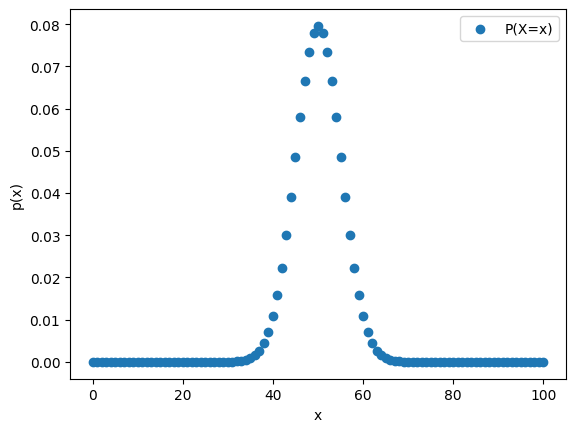

P(mu - sigma< X <= mu+sigma) =  0.6803


In [ ]:
n = 100
p = 1/2

# X = ss.binom(n,p)
X = binom(n,p) #a binomial random variable with n tries and probability p

mean, var = X.stats(moments='mv') #calculate the expected value and variance

sig = math.sqrt(var)

print('E[X] =', mean)
print('Var(X) =', var)
print('np(1-p) =', n*p*(1-p))

#plot the pmf
x_1 = np.arange(0,n+1) #vector with all integers between 0 and n
plt.scatter(x_1, X.pmf(x_1), label = 'P(X=x)')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.show()

#calculate the probability of falling within one standard deviation of the mean
print(f"P(mu - sigma< X <= mu+sigma) = {X.cdf(mean+sig)-X.cdf(mean-sig): .4f}")